In [2]:
import Picoquant_PL as pl
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.optimize import curve_fit
import os
import pandas as pd
#Make these df at the start
confocal_lifetimes_df=pd.DataFrame(columns = ['PP','lifetime']) 
bp_lifetimes_df=pd.DataFrame(columns=['PP','lifetime'])

Note the use of Picoquant_PL- find more info in relevent folders

# Import data

In [3]:
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 1\Microscope')
filelist = glob.glob("2022-01-17\Test.sptw\plottable\*.ptu")     #Plottable is where I have pllaced all the best plots, confocal and bp
bp_filelist = [x for x in filelist if "bp" in x]        #find the files containing bp
filelist = [x for x in filelist if 'bp' not in x]       #find the files that are confocal

# Define function to model decay, in this case just an exponential decay

In [5]:
def func(t,a,b,c):
    return a * np.exp(-t/b) +c

# Create a model and a plot for all the confocal files

 - Loading '2022-01-17\Test.sptw\plottable\dl_azz_confocal1.ptu' ... 
 [DONE]



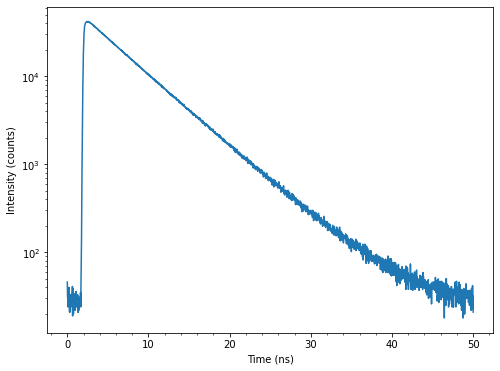

[6.89327100e+04 5.29831169e+00 4.33211101e+01]
[[ 9.59909331e+02 -6.71533368e-02  2.49091262e+01]
 [-6.71533368e-02  6.25310105e-06 -3.97384206e-03]
 [ 2.49091262e+01 -3.97384206e-03  8.00231645e+00]]
[3.09824036e+01 2.50062013e-03 2.82883659e+00]


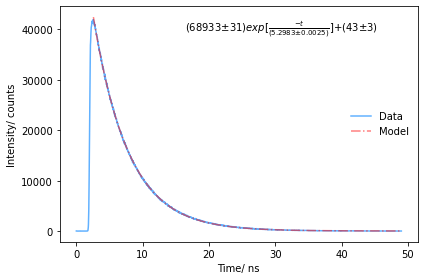

<Figure size 432x288 with 0 Axes>

 - Loading '2022-01-17\Test.sptw\plottable\sl_conc_confocal3.ptu' ... 
 [DONE]



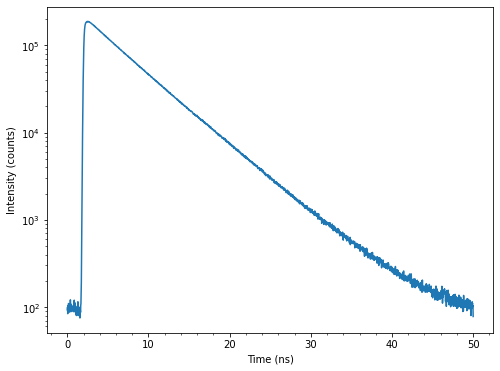

[3.12803235e+05 5.24712078e+00 2.50641617e+02]
[[ 1.52296978e+04 -2.30026157e-01  3.57182315e+02]
 [-2.30026157e-01  4.60875947e-06 -1.24172479e-02]
 [ 3.57182315e+02 -1.24172479e-02  1.14393145e+02]]
[1.23408662e+02 2.14680215e-03 1.06954731e+01]


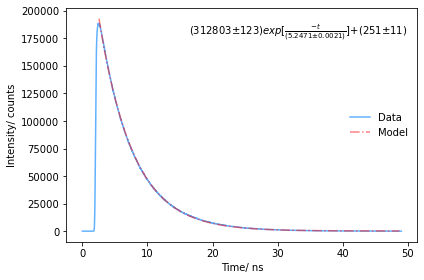

<Figure size 432x288 with 0 Axes>

 - Loading '2022-01-17\Test.sptw\plottable\sl_zz_confocal1.ptu' ... 
 [DONE]



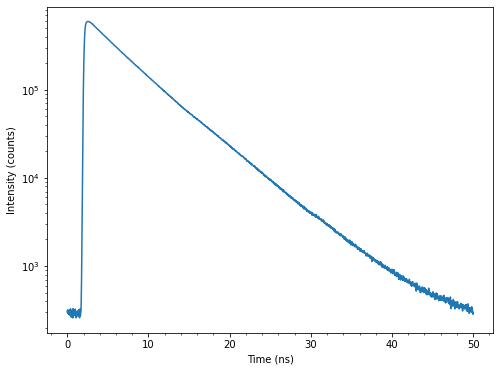

[1.01339914e+06 5.03677001e+00 1.58670701e+03]
[[ 4.32025820e+05 -1.89175879e+00  9.31812655e+03]
 [-1.89175879e+00  1.08121925e-05 -9.11570420e-02]
 [ 9.31812655e+03 -9.11570420e-02  2.76171070e+03]]
[6.57286710e+02 3.28818985e-03 5.25519809e+01]


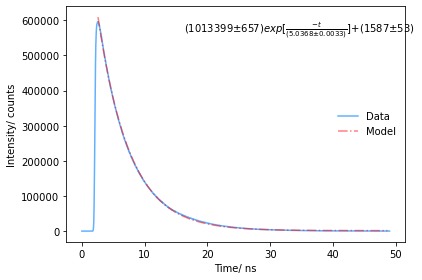

<Figure size 432x288 with 0 Axes>

 - Loading '2022-01-17\Test.sptw\plottable\sl_zz_confocal_r_23.ptu' ... 
 [DONE]



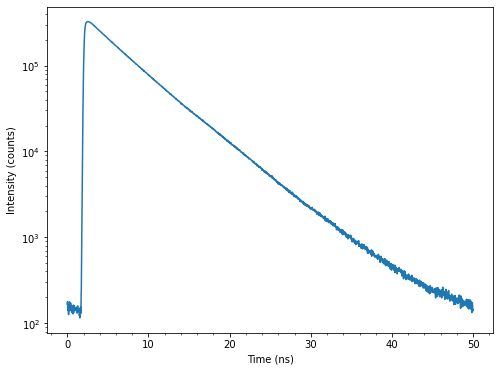

[5.49007874e+05 5.11134761e+00 7.03897602e+02]
[[ 9.36775329e+04 -7.76585662e-01  2.10542414e+03]
 [-7.76585662e-01  8.46825002e-06 -3.95542256e-02]
 [ 2.10542414e+03 -3.95542256e-02  6.47884857e+02]]
[3.06067857e+02 2.91002578e-03 2.54535824e+01]


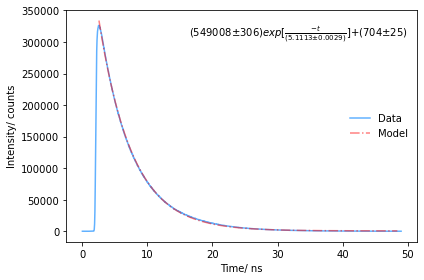

<Figure size 432x288 with 0 Axes>

In [6]:
for i in range(len(filelist)):
    try:
        data, tags = pl.import_convert(filelist[i][:-4], detector=1)
        t, counts = pl.tcspc(data, tags)
        t=t[:-40]       #Remove next excitation
        counts=counts[:-40]     #Remove next excitation
        popt, pcov = curve_fit(func, t[np.argmax(counts[:500]):500+np.argmin(counts[500:])], counts[np.argmax(counts):500+np.argmin(counts[500:])], maxfev=10000000, p0=[3000,6,300])
        print(popt) # optimal parameters
        print(pcov) # Covariance matrix
        perr_sd = np.sqrt(np.diag(pcov)) # Gives standard deviation
        print(perr_sd)
        fig, ax = plt.subplots()
        a, b, c = popt
        ax.plot(t, counts,alpha =0.7, linewidth=1.5,color='dodgerblue', label='Data')
        ax.text(np.max(t)/3,np.max(counts)*0.95, r'$('+str(round(a))+u'\u00B1'+str(round(perr_sd[0]))+ r'$' + r'$)exp$'+r'$[\frac{-t}{(' + str(round(b,4))+u'\u00B1 '+str(round(perr_sd[1],4))+ ')}]$' + r'$ +(' +str(round(c)) +u' \u00B1' + str(round(perr_sd[2])) +')}$', color='black')
        plt.plot(t[np.argmax(counts[:500]):(len(counts)-50)+np.argmin(counts[-50:])], func(t[np.argmax(counts[:500]):(len(counts)-50)+np.argmin(counts[-50:])], *popt),alpha =0.5,linestyle='dashdot',color='red', label= 'Model')
        #plt.fill_between(t[np.argmax(counts):np.argmin(counts)], func(t[np.argmax(counts):np.argmin(counts)], a-perr_sd[0],b+perr_sd[1],c-perr_sd[2]), func(t[np.argmax(counts):np.argmin(counts)], a+perr_sd[0],b-perr_sd[1],c+perr_sd[2]),color='gray', alpha=0.7)
        ax.legend(loc="center right", frameon=False)
        plt.xlabel('Time/ ns')
        plt.ylabel('Intensity/ counts')
        plt.tight_layout()
        plt.show()
        #plt.savefig(filelist[i][29:-4]+'decay curve.png', dpi=1000) 
        ax.set_yscale('log') # now plot on a log scale
        plt.tight_layout()
        plt.show()
        #plt.savefig(filelist[i][29:-4]+'decay curvelog_scale.png', dpi=1000)
        confocal_lifetimes_df=confocal_lifetimes_df.append({'PP':filelist[i][:-4],'lifetime':b},ignore_index=True)
    except:
        print(filelist[i]+' gave an error')
        break
    

# Create a model and a plot for all the fixed excitation files

 - Loading '2022-01-17\Test.sptw\plottable\dl_azz_bp1.ptu' ... 
 [DONE]



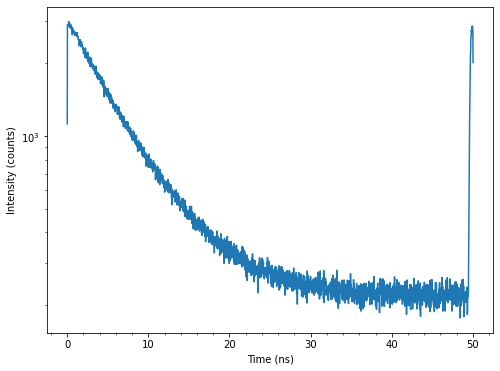

[2842.60948464    6.30623292  217.04671816]
[[ 1.04374073e+01 -2.36351372e-02  5.75729334e-02]
 [-2.36351372e-02  1.49616470e-04 -5.76441336e-03]
 [ 5.75729334e-02 -5.76441336e-03  6.37951428e-01]]
[3.23069765 0.01223178 0.79871862]


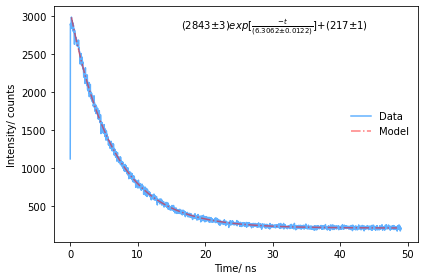

<Figure size 432x288 with 0 Axes>

 - Loading '2022-01-17\Test.sptw\plottable\sl_conc_bp3.ptu' ... 
 [DONE]



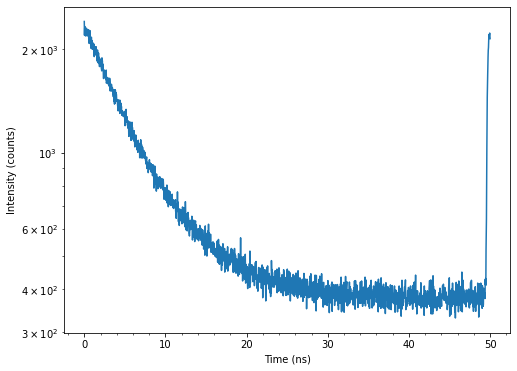

[1985.08170673    6.18407836  376.85437821]
[[ 1.09650416e+01 -3.39013118e-02 -2.08952955e-02]
 [-3.39013118e-02  3.35733849e-04 -9.90899547e-03]
 [-2.08952955e-02 -9.90899547e-03  8.04542824e-01]]
[3.31135043 0.01832304 0.89696311]


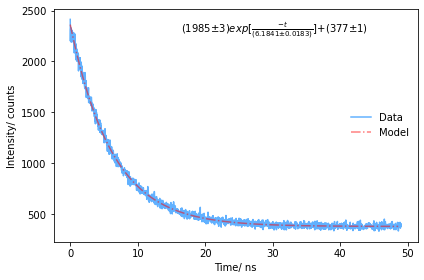

<Figure size 432x288 with 0 Axes>

 - Loading '2022-01-17\Test.sptw\plottable\sl_zz_bp_long1.ptu' ... 
 [DONE]



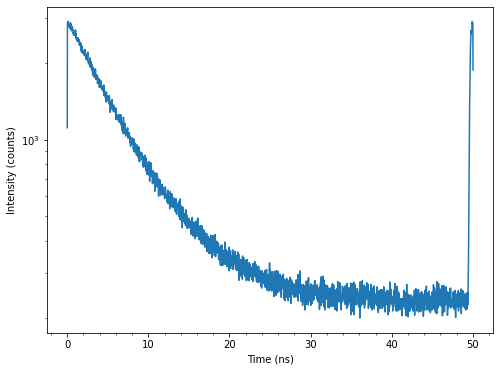

[2737.88376496    6.18658588  232.14114468]
[[ 1.27019389e+01 -2.89345936e-02  2.74451619e-02]
 [-2.89345936e-02  2.41324157e-04 -1.31614741e-02]
 [ 2.74451619e-02 -1.31614741e-02  1.47834205e+00]]
[3.56397796 0.01553461 1.2158709 ]


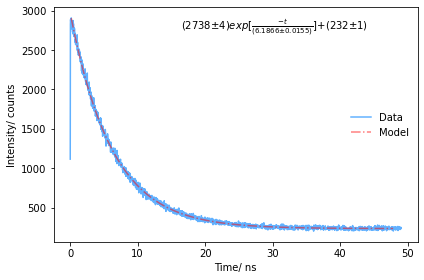

<Figure size 432x288 with 0 Axes>

 - Loading '2022-01-17\Test.sptw\plottable\sl_zz_bp_r_24.ptu' ... 
 [DONE]



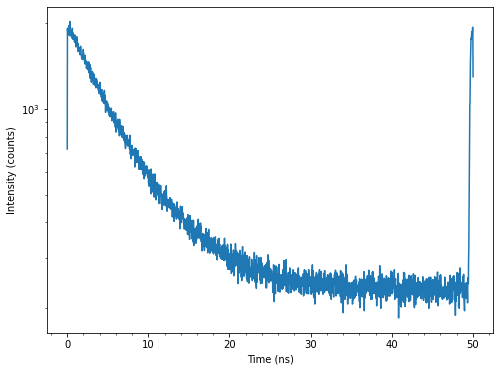

[1773.6016777     6.18892544  230.96225424]
[[ 9.20186795e+00 -3.36340104e-02  1.20813119e-01]
 [-3.36340104e-02  3.49703895e-04 -1.02522965e-02]
 [ 1.20813119e-01 -1.02522965e-02  7.12462837e-01]]
[3.03345808 0.01870037 0.84407514]


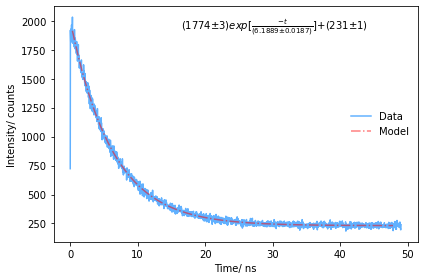

<Figure size 432x288 with 0 Axes>

In [7]:
for i in range(len(bp_filelist)):
    try:
        data, tags = pl.import_convert(bp_filelist[i][:-4], detector=1)
        t, counts = pl.tcspc(data, tags)
        t=t[:-40]       #Remove next excitation
        counts=counts[:-40]     #Remove next excitation
        popt, pcov = curve_fit(func, t[np.argmax(counts[:500]):500+np.argmin(counts[500:])], counts[np.argmax(counts):500+np.argmin(counts[500:])], maxfev=10000000, p0=[3000,6,300])#, method='lm')#
        print(popt)
        print(pcov)
        perr_sd = np.sqrt(np.diag(pcov))
        print(perr_sd)
        fig, ax = plt.subplots()
        a, b, c = popt
        ax.plot(t, counts,alpha =0.7, linewidth=1.5,color='dodgerblue', label='Data')
        ax.text(np.max(t)/3,np.max(counts)*0.95, r'$('+str(round(a))+u'\u00B1'+str(round(perr_sd[0]))+ r'$' + r'$)exp$'+r'$[\frac{-t}{(' + str(round(b,4))+u'\u00B1 '+str(round(perr_sd[1],4))+ ')}]$' + r'$ +(' +str(round(c)) +u' \u00B1' + str(round(perr_sd[2])) +')}$', color='black')
        plt.plot(t[np.argmax(counts[:500]):(len(counts)-50)+np.argmin(counts[-50:])], func(t[np.argmax(counts[:500]):(len(counts)-50)+np.argmin(counts[-50:])], *popt),alpha =0.5,linestyle='dashdot',color='red', label= 'Model')
        #plt.fill_between(t[np.argmax(counts):np.argmin(counts)], func(t[np.argmax(counts):np.argmin(counts)], a-perr_sd[0],b+perr_sd[1],c-perr_sd[2]), func(t[np.argmax(counts):np.argmin(counts)], a+perr_sd[0],b-perr_sd[1],c+perr_sd[2]),color='gray', alpha=0.7)
        ax.legend(loc="center right", frameon=False)
        plt.xlabel('Time/ ns')
        plt.ylabel('Intensity/ counts')
        plt.tight_layout()
        plt.show()
        #plt.savefig(bp_filelist[i][29:-4]+'decay curve.png', dpi=1000)
        ax.set_yscale('log')
        plt.tight_layout()
        plt.show()
        #plt.savefig(bp_filelist[i][29:-4]+'decay curvelog_scale.png', dpi=1000)
        bp_lifetimes_df=bp_lifetimes_df.append({'PP':bp_filelist[i][:-4],'lifetime':b},ignore_index=True)
    except:
        print(bp_filelist[i]+' gave an error')
        break

# Create a 2 histograms of lifetimes next to eachother to show difference between confocal and fixed illumination

Note- not all the data is used here so histograms look a bit bare

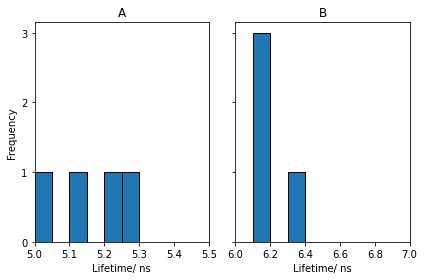

In [8]:
fig, axs = plt.subplots(1, 2, tight_layout=True,sharey =True)
plt.locator_params(axis='y', nbins=5)
axs[0].hist(confocal_lifetimes_df['lifetime'],range=[5,5.5], bins=10,edgecolor='black')
axs[0].set_xlim([5,5.5])
axs[0].set_xlabel('Lifetime/ ns')
axs[0].set_ylabel('Frequency')
axs[0].set_title('A')
axs[1].hist(bp_lifetimes_df['lifetime'],range=[6,7], bins=10,edgecolor='black')
axs[1].set_xlim([6,7])
axs[1].set_xlabel('Lifetime/ ns')
axs[1].set_title('B')
plt.savefig('Lifetime histogram.png', dpi=1000)